In [1]:
#using Pkg
#Pkg.add("BenchmarkTools")

include("Peripheral_subspace_structure.jl")
using Plots
using BenchmarkTools



# Exampel 1: Phase flip channel

$\mathcal T(\rho)= \sigma_Z \rho \sigma_Z$

In [2]:
kraus_ops=[[1 0;0 -1]];

##  Structure of peripheral subspace

In [3]:
P_C, P,basis,U_matrix=structure_of_peripheral_subspace(kraus_ops);

Number of Sectors K= 1
d_1 = 2	 d'_1 = 1


In [4]:
U_matrix

2×2 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im

In [8]:
P_C, P,basis,U_matrix=structure_of_fixed_subspace(kraus_ops);

trace Id=2.0 + 0.0im
Number of Sectors K= 2
d_1 = 1	 d'_1 = 1
d_2 = 1	 d'_2 = 1


In [9]:
U_matrix

2×2 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im

# Example 2: tensor product of two phase flip channel

kraus_ops={$\sigma_z\otimes \sigma_z$}

In [10]:
Z=[1 0;0 -1];
kraus_ops=[kron(Z,Z)];

In [16]:
P_C, P,basis,U_matrix=structure_of_peripheral_subspace(kraus_ops);


trace Id=4.0 + 0.0im
Number of Sectors K= 1
d_1 = 4	 d'_1 = 1


In [13]:
P_C, P,basis,U_matrix=structure_of_fixed_subspace(kraus_ops);


trace Id=4.0 + 0.0im
Number of Sectors K= 2
d_1 = 2	 d'_1 = 1
d_2 = 2	 d'_2 = 1


# Example 3: 

kraus_ops =$\frac{1}{\sqrt 2}${ $\mathbf I\otimes \sigma_z, \sigma_z \otimes\mathbf I$ }

In [18]:
I2=[1 0;0 1];
Z=[1 0;0 -1];
kraus_ops=[kron(I2,Z)./sqrt(2),kron(Z,I2)./sqrt(2)];

In [19]:
P_C, P,basis,U_matrix=structure_of_peripheral_subspace(kraus_ops);


trace Id=4.0 + 0.0im
Number of Sectors K= 2
d_1 = 2	 d'_1 = 1
d_2 = 2	 d'_2 = 1


In [21]:
P_C, P,basis,U_matrix=structure_of_fixed_subspace(kraus_ops);


trace Id=4.0 + 0.0im
Number of Sectors K= 4
d_1 = 1	 d'_1 = 1
d_2 = 1	 d'_2 = 1
d_3 = 1	 d'_3 = 1
d_4 = 1	 d'_4 = 1


# Example 4: Collective Noise Channel

Collective noise on $n$ qubits can be described using the operators $\mathbf{X} = X_1 + \cdots + X_n$, $\mathbf{Y} = Y_1 + \cdots + Y_n$, and $\mathbf{Z} = Z_1 + \cdots + Z_n$, where $X_i$, $Y_i$, and $Z_i$ are the Pauli matrices $\sigma_X$, $\sigma_Y$, and $\sigma_Z$ acting on the $i$-th qubit, respectively. The Kraus operators for the collective noise are defined as

$$E_X:= \frac{1}{\sqrt 3} \exp(i\mathbf X) $$
$$E_Y:= \frac{1}{\sqrt 3} \exp(i\mathbf Y) $$
$$E_Z:= \frac{1}{\sqrt 3} \exp(i\mathbf Z) $$


## Kraus_ops for  collective noise channel

In [4]:

# Function to create the tensor product of n identity matrices
function kron_identity(n)
    if n == 0
        return 1
        
    elseif  n == 1
        return I(2)
    else
        return kron(I(2), kron_identity(n-1))
    end
end

# Function to create the X, Y, Z operators for n qubits
function create_operators(n)
    X = [0 1; 1 0]
    Y = [0 -im; im 0]
    Z = [1 0; 0 -1]
    
    X_ops = [kron(kron_identity(i-1), kron(X, kron_identity(n-i))) for i in 1:n]
    Y_ops = [kron(kron_identity(i-1), kron(Y, kron_identity(n-i))) for i in 1:n]
    Z_ops = [kron(kron_identity(i-1), kron(Z, kron_identity(n-i))) for i in 1:n]
    
    return sum(X_ops), sum(Y_ops), sum(Z_ops)
end

# Function to create the Kraus operators
function kraus_operators_collective(n)
    X_sum, Y_sum, Z_sum = create_operators(n)
    
    E_x = (1 / sqrt(3)) * exp(1im * X_sum)
    E_y = (1 / sqrt(3)) * exp(1im * Y_sum)
    E_z = (1 / sqrt(3)) * exp(1im * Z_sum)
    
    return [E_x, E_y, E_z]
end


kraus_operators_collective (generic function with 1 method)

## 3-qubit

In [5]:
kraus_ops= kraus_operators_collective(3);

In [6]:
@btime P_C, P,basis,U_matrix=structure_of_peripheral_subspace(kraus_ops);

Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 = 2
Number of Sectors K= 2
d_1 = 1	 d'_1 = 4
d_2 = 2	 d'_2 =

In [27]:
# Compute the peripheral projector
T_p = compute_peripheral_projector(kraus_ops)
    
# Get right and left eigenvectors with eigenvalue modulus 1
right_eigvecs_fixed, left_eigvecs_fixed = left_and_right_eigenvectors_with_eigenvalue_one(T_p);
peripheral_subspace= right_eigvecs_fixed;

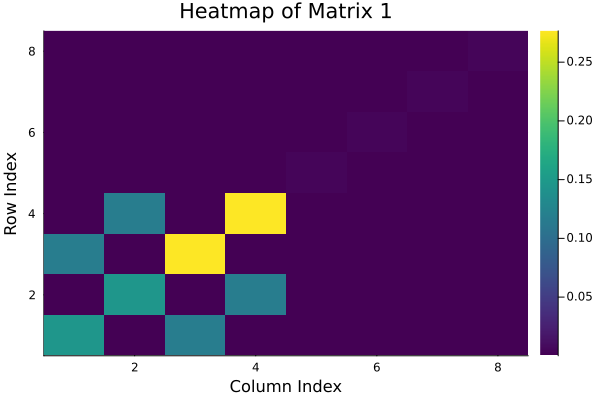

Peripheral matrix 1:
Peripheral matrix 2:
Peripheral matrix 3:
Peripheral matrix 4:
Peripheral matrix 5:


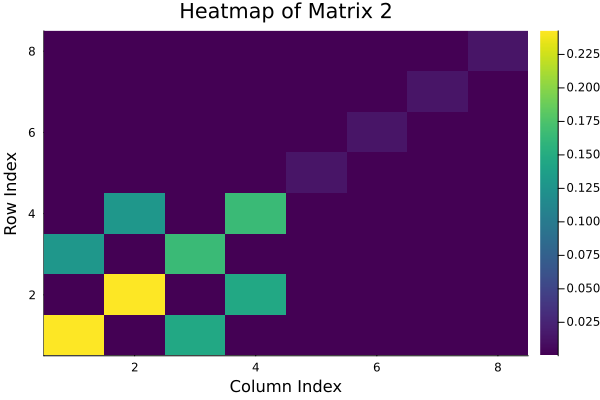

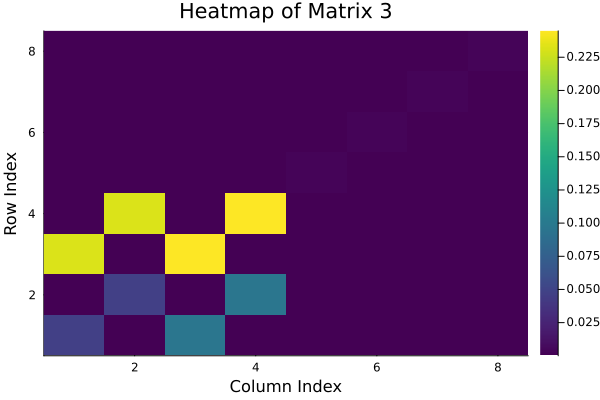

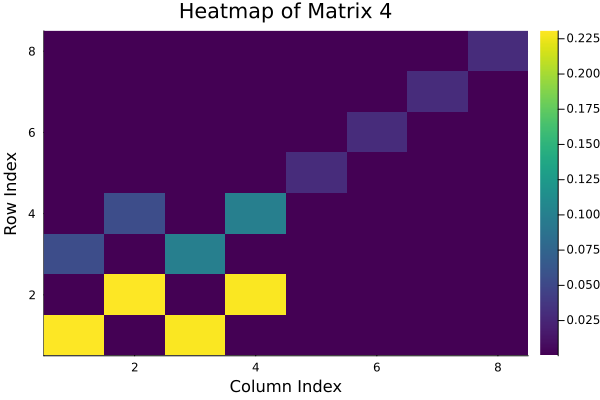

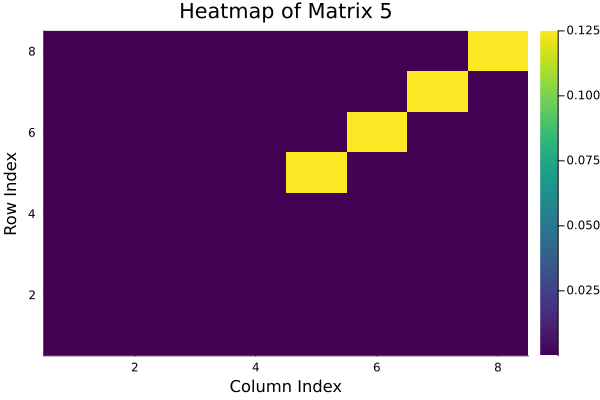

In [ ]:

for i in 1:size(peripheral_subspace)[1]
    M = U_matrix' * peripheral_subspace[i] * U_matrix 
    # Compute absolute values of the matrix
    abs_M = abs.(M)
    
    # Plot the heatmap
    heatmap(
        abs_M,
        color=:viridis,          # Use the 'viridis' color map
        title="Heatmap of Matrix $i",
        xlabel="Column Index",
        ylabel="Row Index"
    )
    display(heatmap(abs_M, color=:viridis, title="Heatmap of Matrix $i", xlabel="Column Index", ylabel="Row Index"))
end

In [ ]:
P_C, P,basis,U_matrix=structure_of_fixed_subspace(kraus_ops);

trace Id=147.0 + 0.0im


InterruptException: InterruptException:

## 4-qubit

In [31]:
kraus_ops= kraus_operators_collective(4);

In [32]:
P_C, P,basis,U_matrix=structure_of_peripheral_subspace(kraus_ops);

trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3


In [27]:
@btime P_C, P,basis,U_matrix=structure_of_peripheral_subspace(kraus_ops);

trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=16.0 + 0.0im
Number of Sectors K= 3
d_1 = 2	 d'_1 = 1
d_2 = 1	 d'_2 = 5
d_3 = 3	 d'_3 = 3
trace Id=1

In [33]:
U_matrix

16×16 Matrix{ComplexF64}:
  5.44562e-17+1.37736e-16im  …   3.24897e-17-4.95373e-16im
  3.43538e-16-2.16635e-16im        0.0970585+0.255286im
   2.6544e-16-2.12563e-16im        0.0884103+0.102607im
   -0.0484866+0.196476im            0.104165-0.204263im
 -4.44441e-16+1.76603e-16im       -0.0935952-0.207695im
     0.176823-0.540962im     …     0.0208689-0.0173555im
    -0.128336+0.344485im          -0.0468963+0.037184im
    1.074e-16-6.71163e-17im        0.0711964+0.0513647im
  -2.3479e-16+1.14198e-18im       -0.0918736-0.150198im
    -0.128336+0.344485im           0.0468963-0.037184im
     0.176823-0.540962im     …    -0.0208689+0.0173555im
  3.84687e-16-1.09194e-16im        0.0830692+0.0774737im
   -0.0484866+0.196476im           -0.104165+0.204263im
  1.35802e-16-2.68666e-16im       -0.0604317-0.0301464im
 -5.18804e-16+7.47948e-16im       -0.0938339-0.098692im
 -1.36665e-16+3.36585e-16im  …  -3.50312e-16-1.00452e-15im

In [24]:
@btime P_C, P,basis,U_matrix  =structure_of_fixed_subspace(kraus_ops);


trace Id=147.0 + 0.0im


InterruptException: InterruptException:

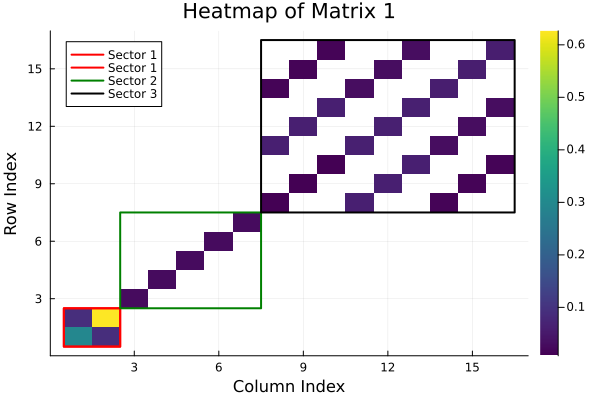

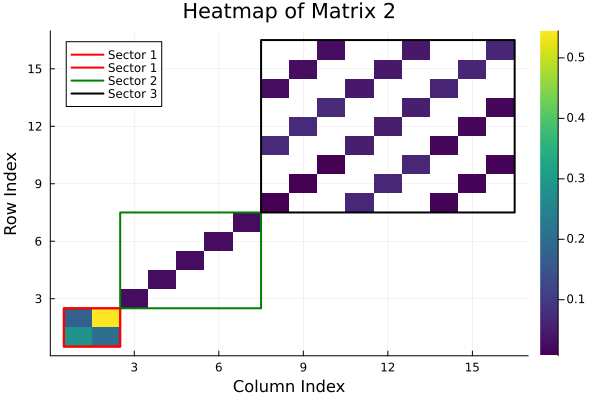

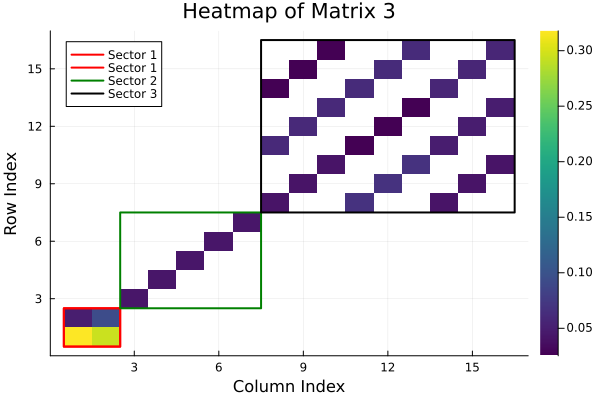

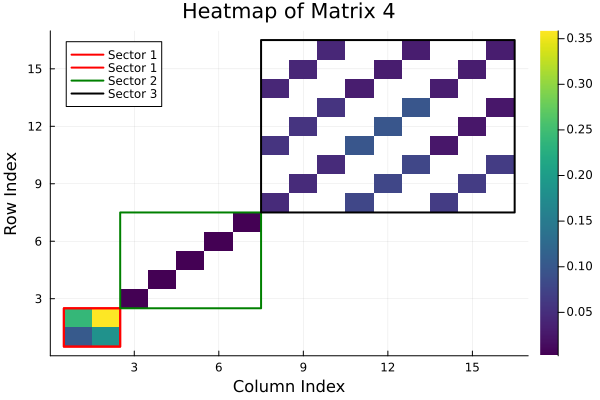

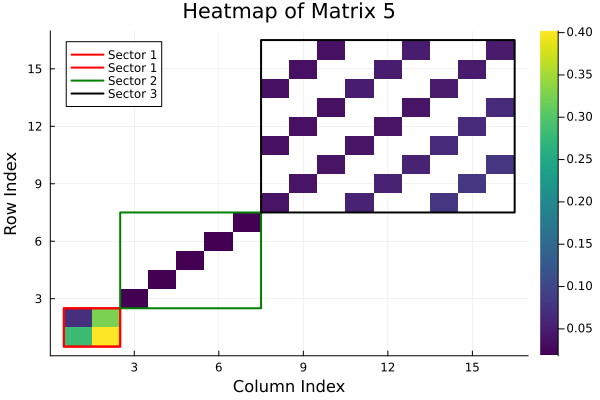

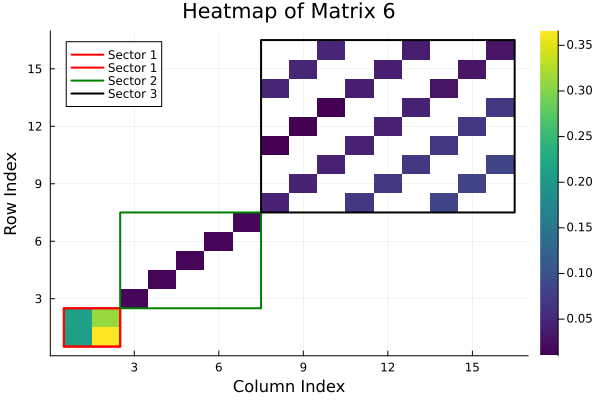

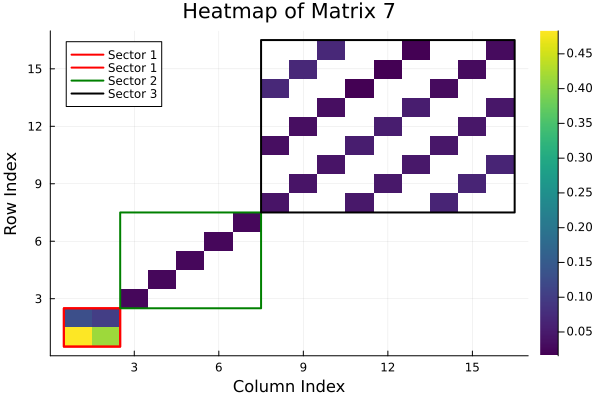

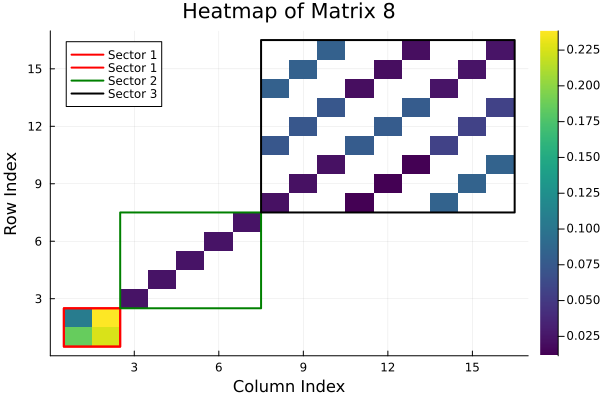

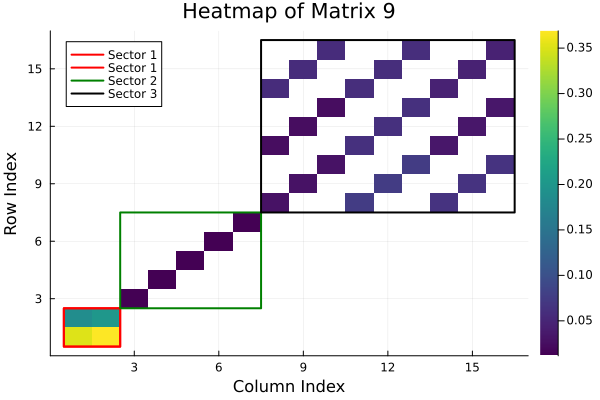

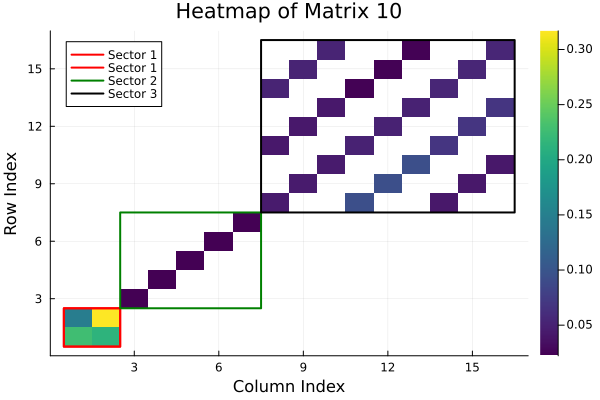

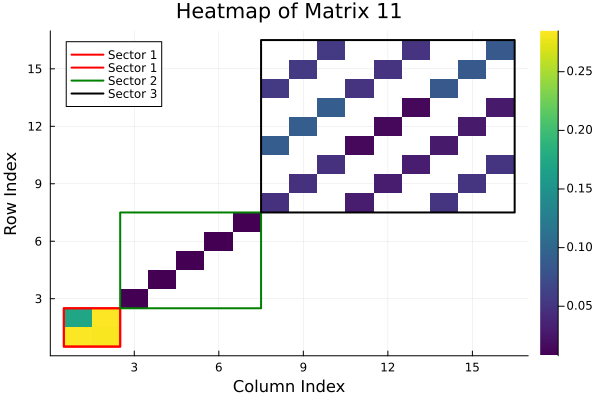

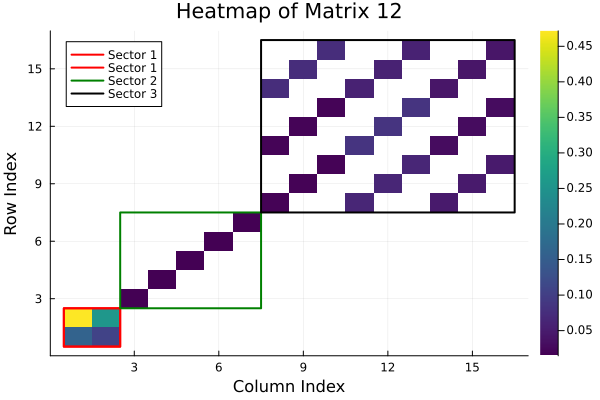

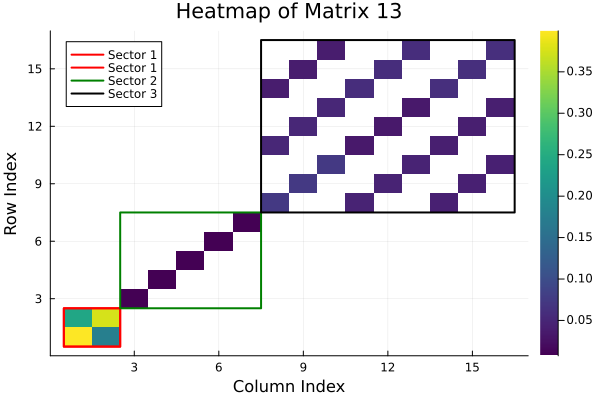

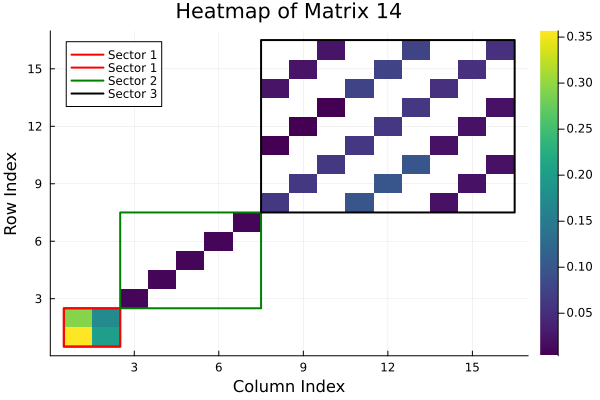

In [34]:
# Compute the peripheral projector
T_p = compute_peripheral_projector(kraus_ops)
    
# Get right and left eigenvectors with eigenvalue modulus 1
right_eigvecs_fixed, left_eigvecs_fixed = left_and_right_eigenvectors_with_eigenvalue_one(T_p);
peripheral_subspace = right_eigvecs_fixed;

for i in 1:size(peripheral_subspace)[1]
    M = U_matrix' * peripheral_subspace[i] * U_matrix 
    # Compute absolute values of the matrix
    abs_M = abs.(M)
    abs_M = map(x -> x < 0.001 ? NaN : x, abs_M)
    # Plot the heatmap
    p = heatmap(
        abs_M,
        color=:viridis,          # Use the 'viridis' color map
        title="Heatmap of Matrix $i",
        xlabel="Column Index",
        ylabel="Row Index"
    )
    
    # Overlay the square
    x_corners = [.5, .5, 2.5, 2.5,.5]  # x-coordinates of the square
    y_corners = [.5, 2.5,2.5, .5,.5]  # y-coordinates of the square
    plot!(
        p,                       # Overlay the plot on the heatmap
        x_corners, y_corners,
        linewidth=2,             # Line width of the square
        color=:red,              # Color of the square
        label="Sector 1"           # Add a label for the square
    )
    x_corners = [.5, .5, 2.5, 2.5,.5]  # x-coordinates of the square
    y_corners = [.5, 2.5,2.5, .5,.5]  # y-coordinates of the square
    plot!(
        p,                       # Overlay the plot on the heatmap
        x_corners, y_corners,
        linewidth=2,             # Line width of the square
        color=:red,              # Color of the square
        label="Sector 1"           # Add a label for the square
    )
    x_corners = [7.5, 7.5, 2.5, 2.5,7.5]  # x-coordinates of the square
    y_corners = [7.5, 2.5,2.5, 7.5,7.5]  # y-coordinates of the square
    plot!(
        p,                       # Overlay the plot on the heatmap
        x_corners, y_corners,
        linewidth=2,             # Line width of the square
        color=:green,              # Color of the square
        label="Sector 2"           # Add a label for the square
    )
    x_corners = [7.5, 7.5, 16.5, 16.5,7.5]  # x-coordinates of the square
    y_corners = [7.5, 16.5,16.5, 7.5,7.5]  # y-coordinates of the square
    plot!(
        p,                       # Overlay the plot on the heatmap
        x_corners, y_corners,
        linewidth=2,             # Line width of the square
        color=:black,              # Color of the square
        label="Sector 3"           # Add a label for the square
    )

    # Ensure the plot is displayed
    display(p)
end

## 5-qubit

In [21]:
kraus_ops= kraus_operators_collective(5);

In [10]:
@btime P_C, P,basis,U_matrix  =structure_of_peripheral_subspace(kraus_ops);


trace Id=32.00000000000001 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.00000000000001 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.00000000000001 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
  21.692 s (381758 allocations: 17.60 GiB)


In [22]:
@btime P_C, P,basis,U_matrix  =structure_of_fixed_subspace(kraus_ops);


trace Id=32.0 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.0 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.0 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.0 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.0 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
trace Id=32.0 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
  4.763 s (348144 allocations: 13.17 GiB)


In [11]:
@time P_C, P,basis,U_matrix  =structure_of_peripheral_subspace(kraus_ops);


trace Id=32.00000000000001 + 0.0im
Number of Sectors K= 3
d_1 = 1	 d'_1 = 6
d_2 = 5	 d'_2 = 2
d_3 = 4	 d'_3 = 4
 22.121272 seconds (381.72 k allocations: 17.603 GiB, 1.71% gc time)


## 6-qubit

In [16]:
kraus_ops= kraus_operators_collective(6);

In [19]:
@time P_C, P,basis,U_matrix  =structure_of_fixed_subspace(kraus_ops);


trace Id=64.00000000000001 + 0.0im
Number of Sectors K= 4
d_1 = 5	 d'_1 = 1
d_2 = 1	 d'_2 = 7
d_3 = 5	 d'_3 = 5
d_4 = 9	 d'_4 = 3
302.440306 seconds (4.52 M allocations: 456.383 GiB, 9.34% gc time, 0.03% compilation time)


In [20]:
@btime P_C, P,basis,U_matrix  =structure_of_fixed_subspace(kraus_ops);


trace Id=64.00000000000001 + 0.0im
Number of Sectors K= 4
d_1 = 5	 d'_1 = 1
d_2 = 1	 d'_2 = 7
d_3 = 5	 d'_3 = 5
d_4 = 9	 d'_4 = 3
trace Id=64.00000000000001 + 0.0im
Number of Sectors K= 4
d_1 = 5	 d'_1 = 1
d_2 = 1	 d'_2 = 7
d_3 = 5	 d'_3 = 5
d_4 = 9	 d'_4 = 3
trace Id=64.00000000000001 + 0.0im
Number of Sectors K= 4
d_1 = 5	 d'_1 = 1
d_2 = 1	 d'_2 = 7
d_3 = 5	 d'_3 = 5
d_4 = 9	 d'_4 = 3
  223.712 s (4476725 allocations: 456.38 GiB)
